In [1]:
from ica_benchmark.processing.ica import get_all_methods
import mne
import matplotlib.pyplot as plt
import matplotlib

# pip install PyQt5
# matplotlib.use("Qt5Agg")
%matplotlib notebook

In [143]:
from pathlib import Path
from ica_benchmark.io.load import BCI_IV_Comp_Dataset

root = Path("/home/paulo/Documents/datasets/BCI_Comp_IV_2a/gdf/")

filepaths = [
    root / "A{}T.gdf".format(str(n).rjust(2, "0"))
    for n
    in range(1, 2)
]
# subjects = {
#     s: [root / f"{s}T.gdf"]
#     for s in subjects
# }
# subjects
epochs_list, metadata_list = BCI_IV_Comp_Dataset.load_dataset(
    filepaths,
    as_epochs=True,
    concatenate=False,
    drop_bad=True,
    return_metadata=True,
    tmin=-1.,
    tmax=6.
)

imagery_epochs_list = BCI_IV_Comp_Dataset.load_dataset(
    filepaths,
    as_epochs=True,
    concatenate=False,
    drop_bad=True,
    return_metadata=False,
    tmin=3.,
    tmax=6.
)

concatenated_imagery_epochs_list = BCI_IV_Comp_Dataset.load_dataset(
    filepaths,
    as_epochs=True,
    concatenate=True,
    drop_bad=True,
    return_metadata=False,
    tmin=3.,
    tmax=6.
)

In [137]:
e = epochs_list[0]
print(metadata_list[0])

{'id': 'A01', 'smoking': 'Yes', 'alcohol_abuse': 'Unknown', 'drug_abuse': 'Unknown', 'medication': 'Unknown', 'weight': None, 'height': None, 'sex': 'Female', 'handedness': 'Right', 'age': 39}


<IPython.core.display.Javascript object>


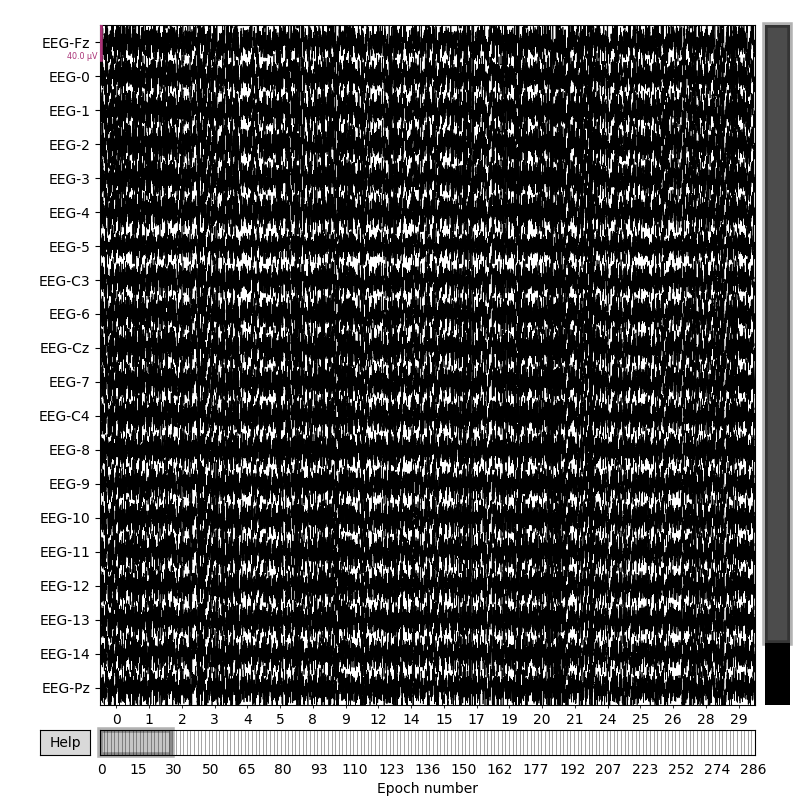

In [138]:
e.plot();

<IPython.core.display.Javascript object>


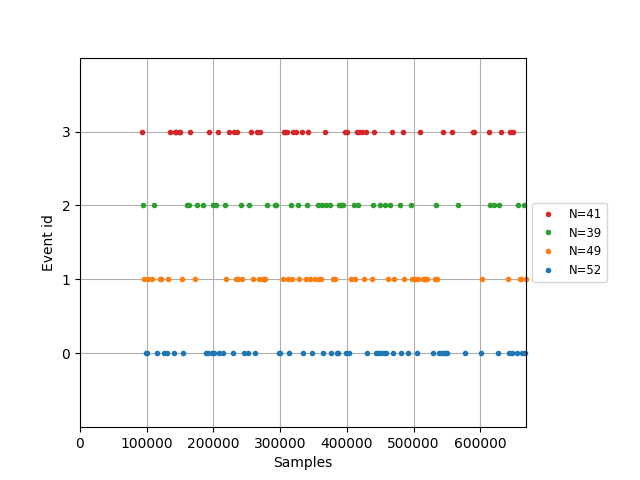

In [139]:
mne.viz.plot_events(epochs_list[0].events);

<IPython.core.display.Javascript object>


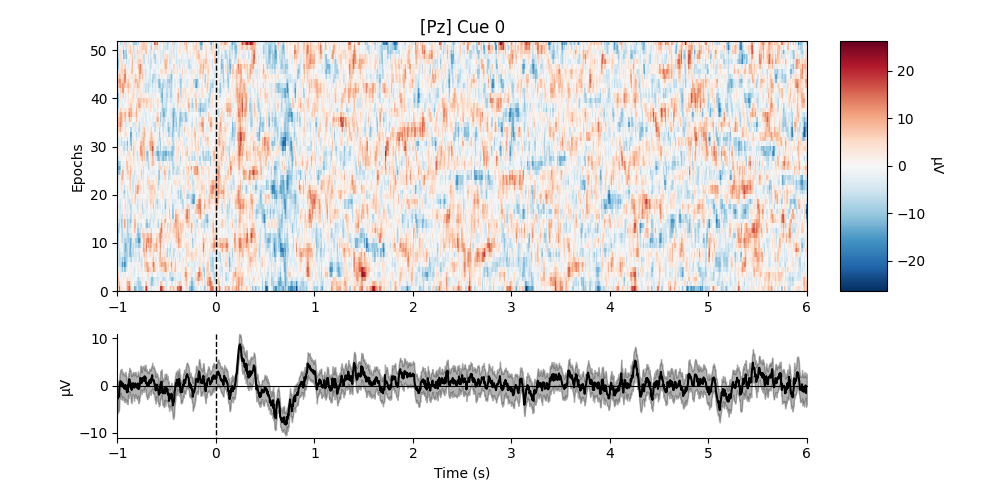

<IPython.core.display.Javascript object>


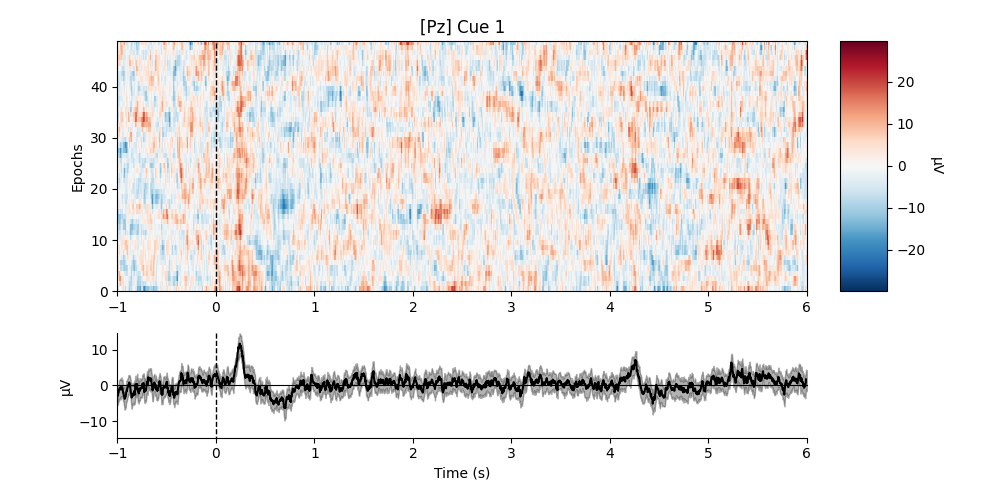

<IPython.core.display.Javascript object>


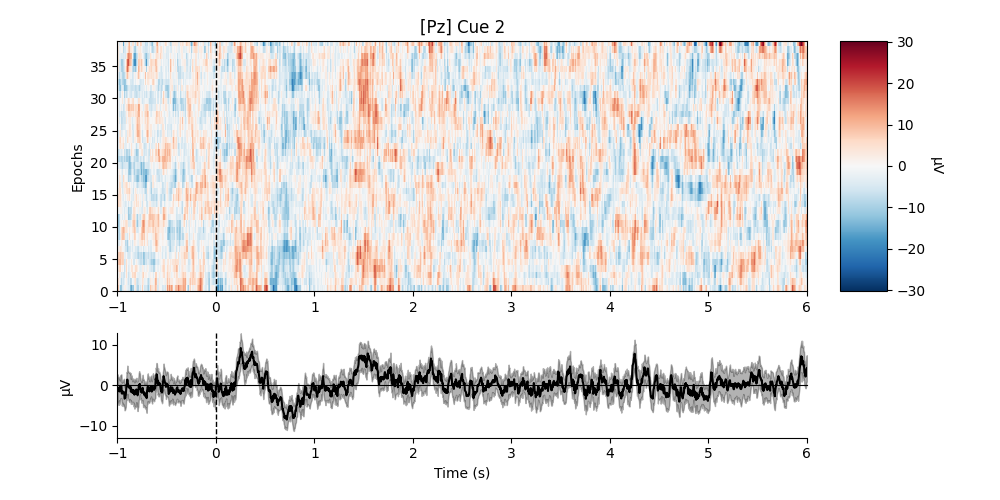

<IPython.core.display.Javascript object>


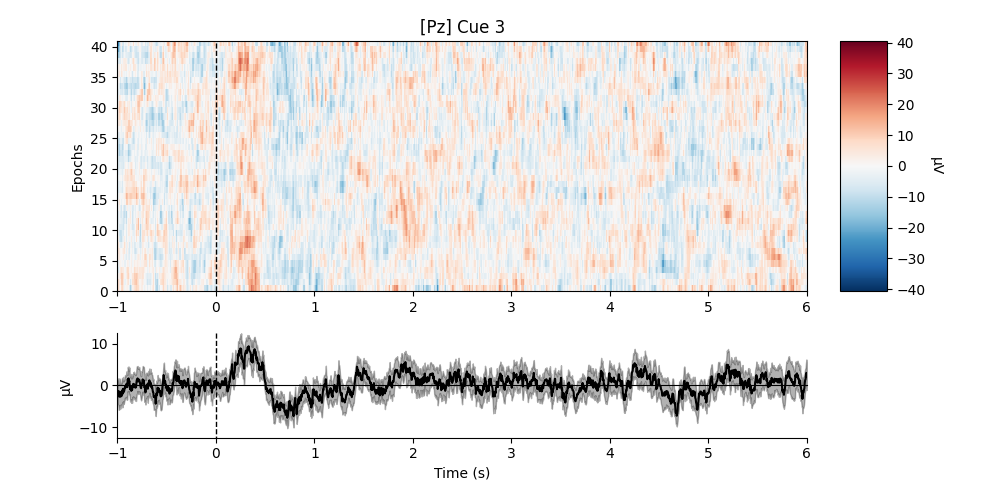

In [140]:
import numpy as np

for c in np.unique(e.events[:, 2]):
    filtered_e = e.copy().load_data().drop(
        e.events[:, 2] != c
    )

    fig, = mne.viz.plot_epochs_image(
        filtered_e,
        sigma=1,
        show=False,
        picks=["EEG-Pz"],
        title=f"[Pz] Cue {c}"
    );
    
    fig.set_size_inches(10, 5, forward=True)
    fig.show()

<IPython.core.display.Javascript object>


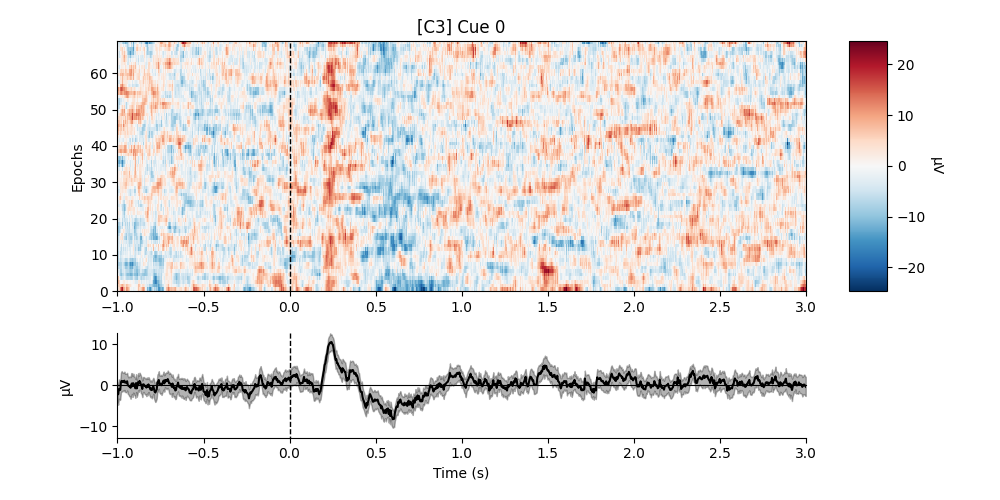

Figure(640x480)


<IPython.core.display.Javascript object>


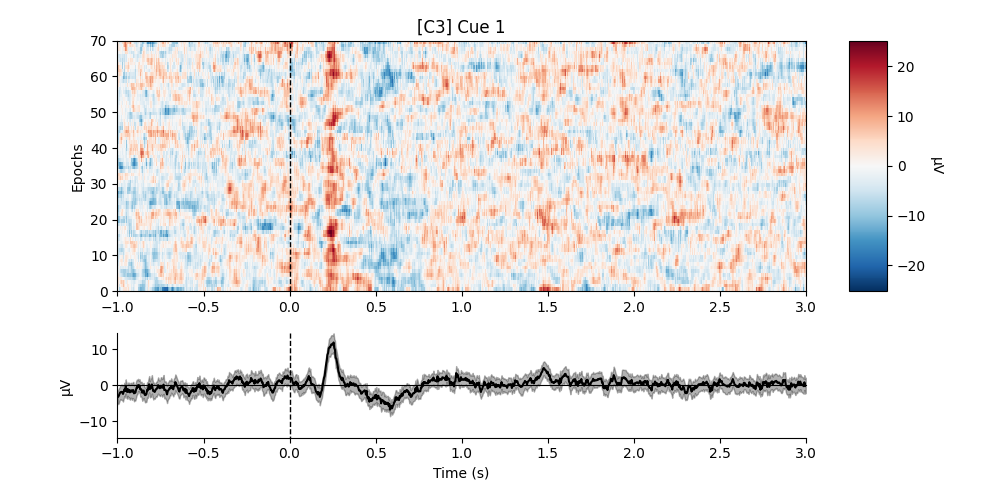

Figure(640x480)


<IPython.core.display.Javascript object>


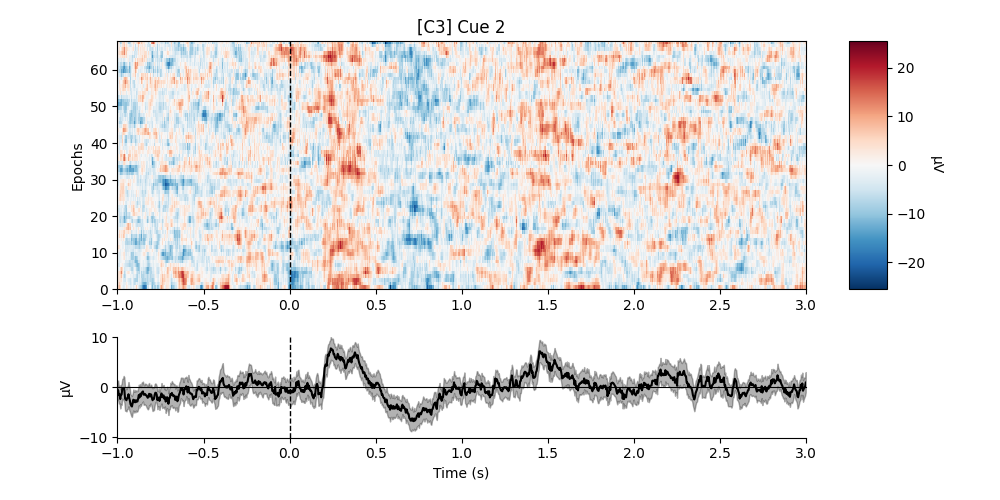

Figure(640x480)


<IPython.core.display.Javascript object>


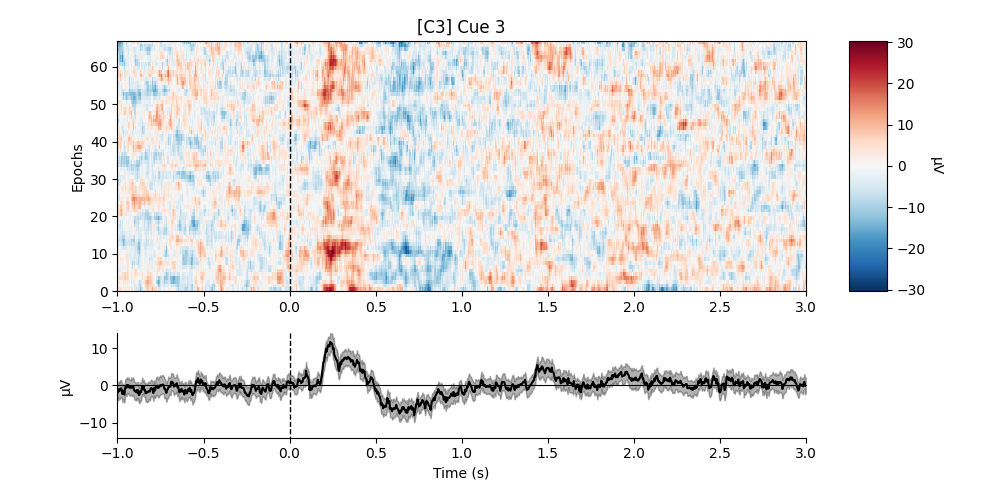

Figure(640x480)


In [19]:
import numpy as np

for c in np.unique(e.events[:, 2]):
    filtered_e = e.copy().load_data().drop(
        e.events[:, 2] != c
    )

    fig = mne.viz.plot_epochs_image(filtered_e, sigma=1, show=False, picks=["EEG-C3"], title=f"[C3] Cue {c}")[0];
    print(fig)
    fig.set_size_inches(10, 5, forward=True)
    fig.show()

<IPython.core.display.Javascript object>


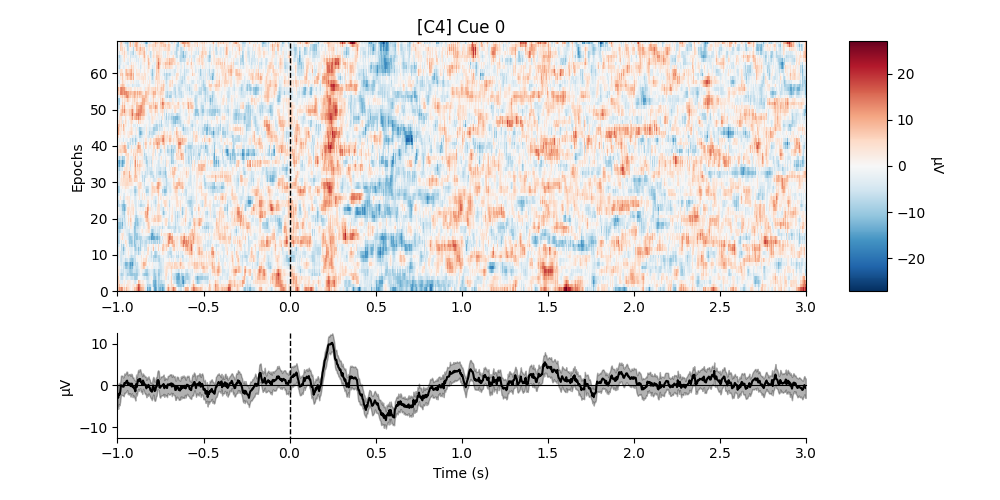

Figure(640x480)


<IPython.core.display.Javascript object>


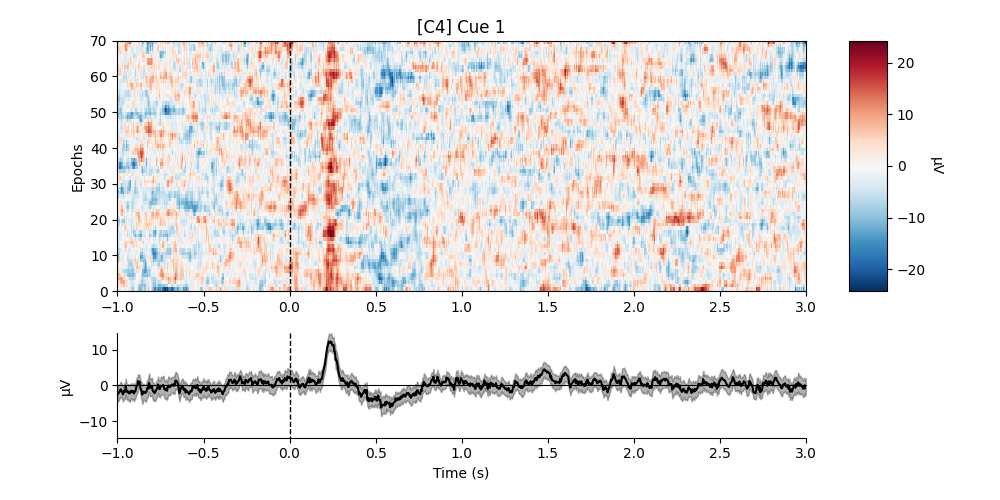

Figure(640x480)


<IPython.core.display.Javascript object>


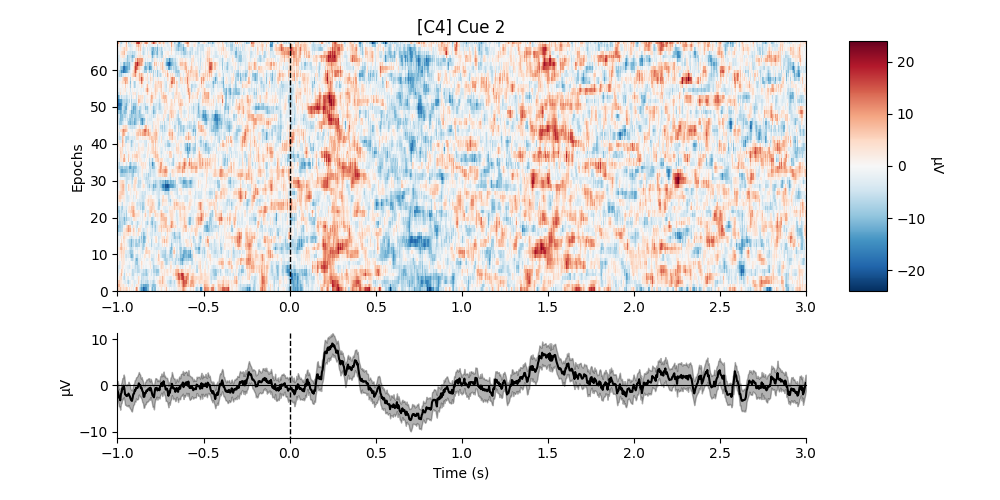

Figure(640x480)


<IPython.core.display.Javascript object>


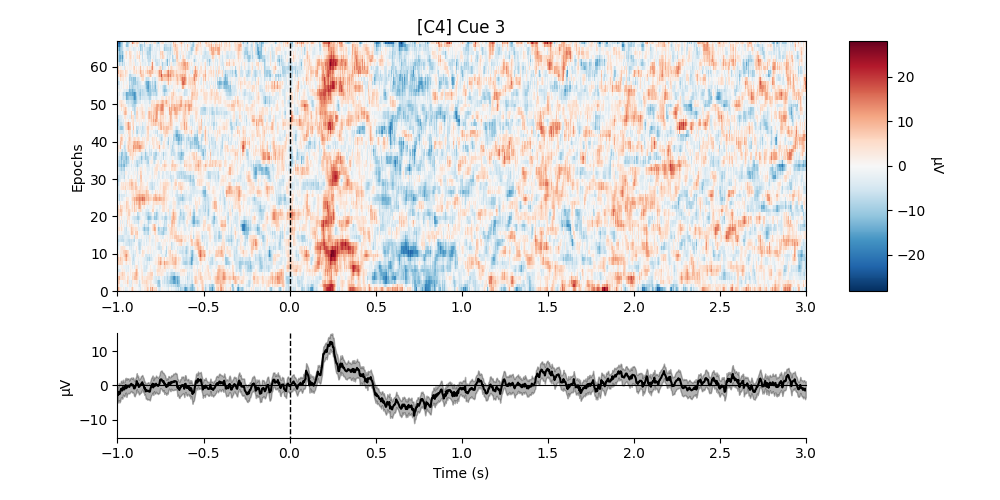

Figure(640x480)


In [20]:
import numpy as np

for c in np.unique(e.events[:, 2]):
    filtered_e = e.copy().load_data().drop(
        e.events[:, 2] != c
    )

    fig = mne.viz.plot_epochs_image(filtered_e, sigma=1, show=False, picks=["EEG-C4"], title=f"[C4] Cue {c}")[0];
    print(fig)
    fig.set_size_inches(10, 5, forward=True)
    fig.show()

<IPython.core.display.Javascript object>


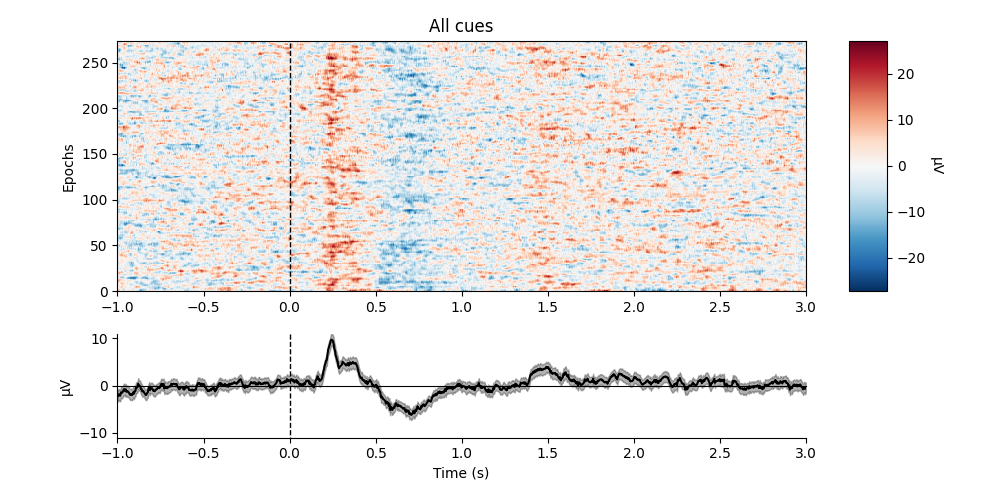

In [21]:
fig = mne.viz.plot_epochs_image(e, sigma=1, show=False, picks=["EEG-Pz"], title=f"All cues")[0];
fig.set_size_inches(10, 5, forward=True)
fig.show()

<IPython.core.display.Javascript object>


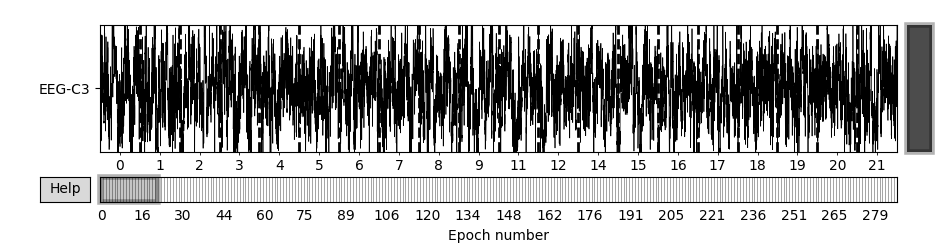

In [22]:
# e.copy().load_data().pick("EEG-1").plot();
# e.copy().load_data().pick("EEG-1").get_data();
mne.viz.plot_epochs(e.copy().load_data().pick("EEG-C3"));

<IPython.core.display.Javascript object>


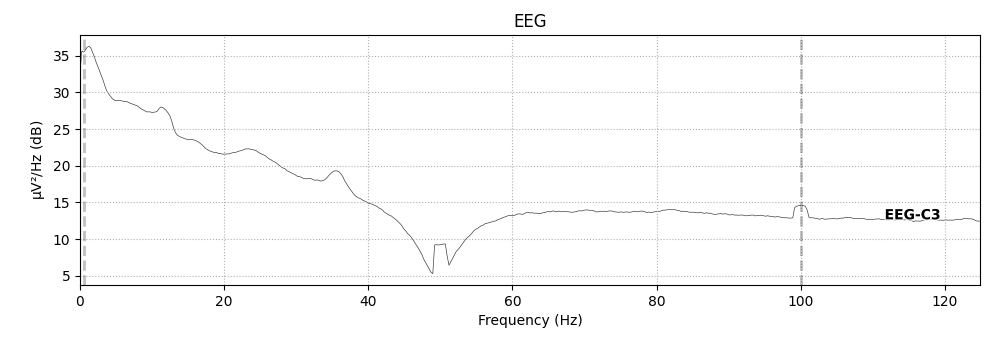

In [23]:
# e.copy().load_data().pick("EEG-1").plot();
# e.copy().load_data().pick("EEG-1").get_data();
mne.viz.plot_epochs_psd(e.copy().load_data().pick("EEG-C3"));

In [18]:
e_tfr = mne.time_frequency.tfr_multitaper(e, freqs=np.linspace(1, 10, 40), n_cycles=1.5, average=False, return_itc=False)

<IPython.core.display.Javascript object>


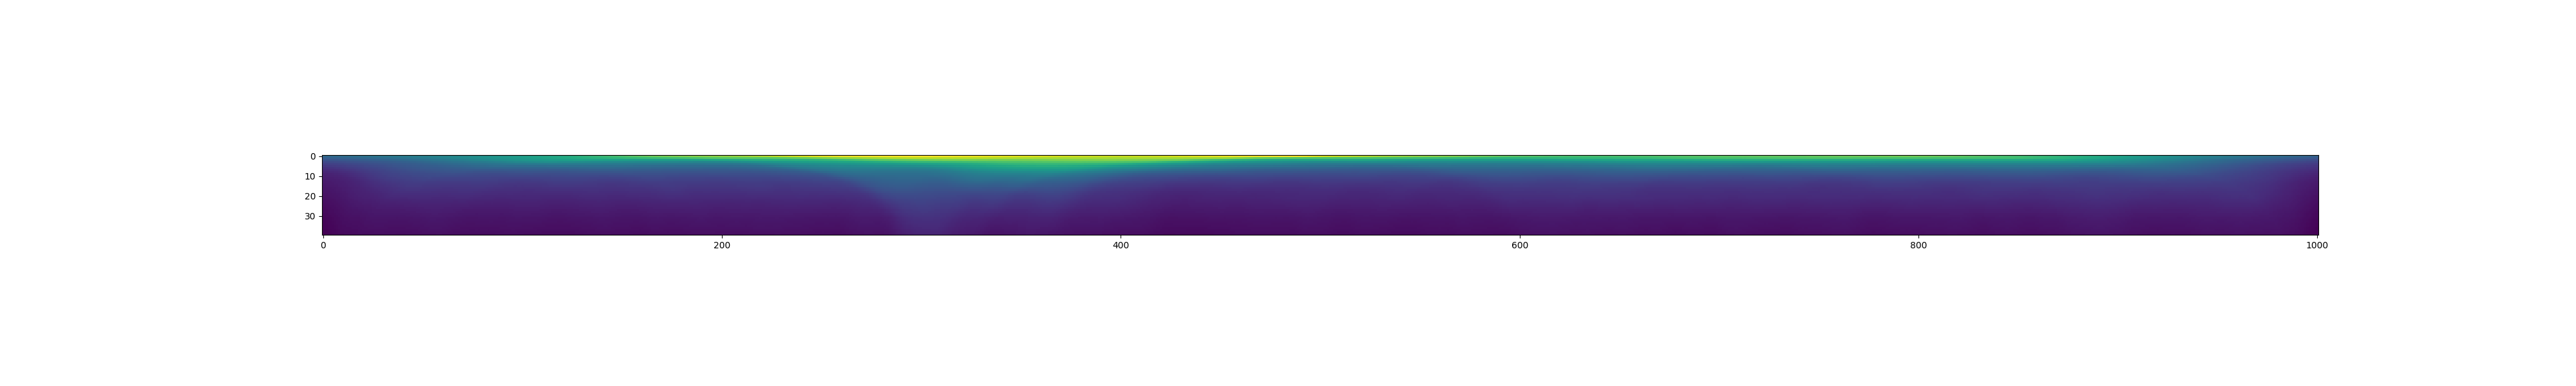

In [29]:
plt.figure(figsize=(40, 6))
fig = plt.imshow(e_tfr.data[:,e.ch_names.index("EEG-C3"), :, :].mean(0))


<IPython.core.display.Javascript object>


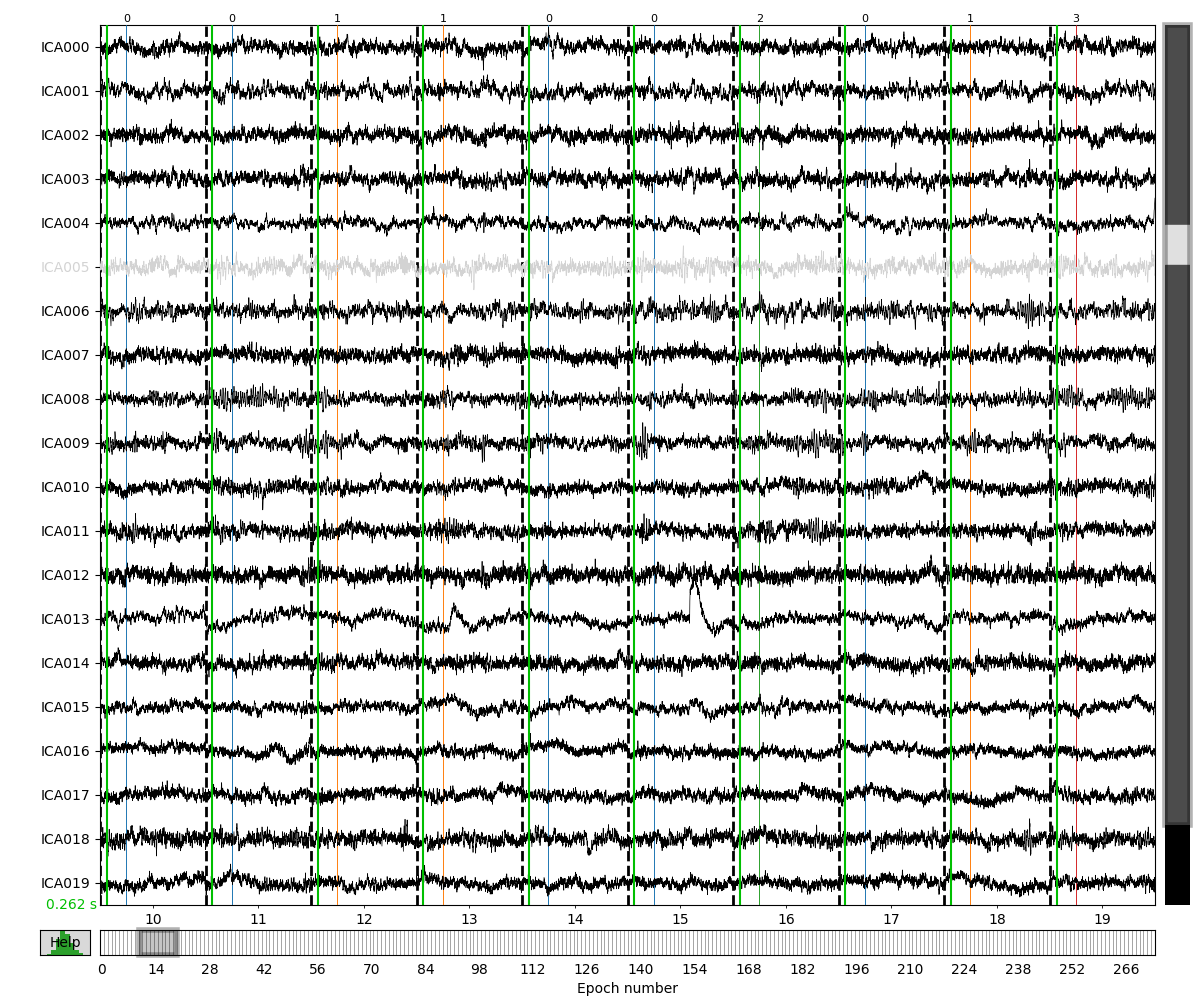

In [15]:
from ica_benchmark.processing.ica import get_ica_instance

ICA = get_ica_instance("picard", n_components=len(e.ch_names))
ICA.fit(e)
fig = mne.viz.plot_ica_sources(
    ICA,
    e.copy().load_data(),
    show=False,
    start=10,
    stop=20
);
fig.set_size_inches(12, 10, forward=True)
fig.show()

In [81]:
from statsmodels.tsa.stattools import acf

def multi_trial_acf(x, nlags=100):
    autocorr_sequence = 0
    for trial_number in range(len(x)):
        autocorr_sequence += acf(x[trial_number], nlags=nlags)
    return autocorr_sequence / len(x)

<IPython.core.display.Javascript object>


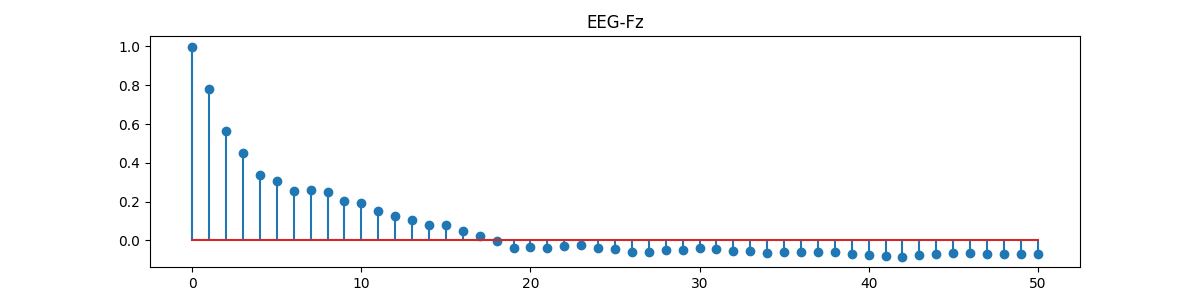

<IPython.core.display.Javascript object>


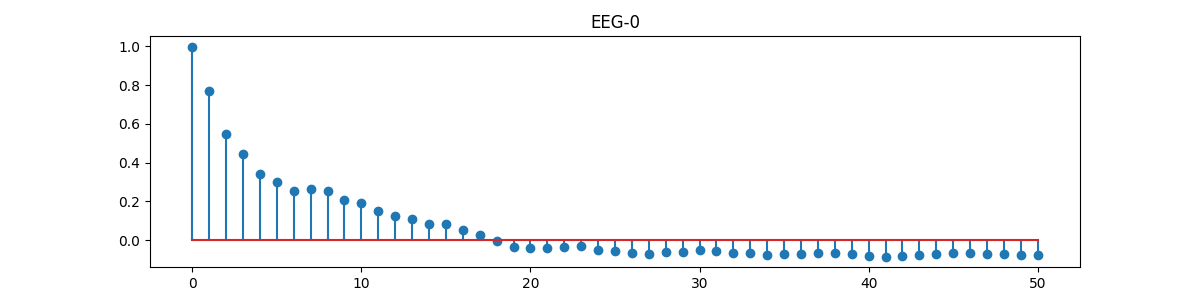

<IPython.core.display.Javascript object>


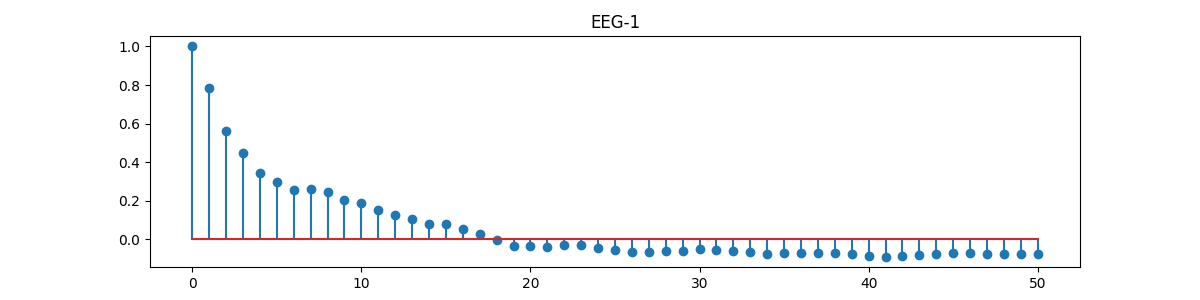

<IPython.core.display.Javascript object>


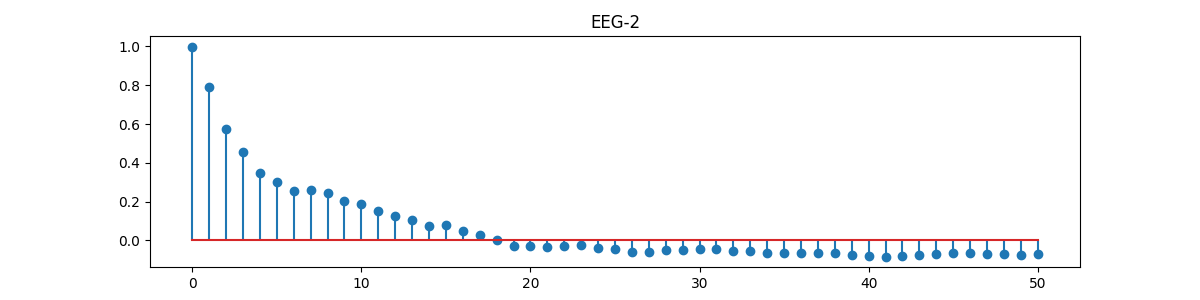

<IPython.core.display.Javascript object>


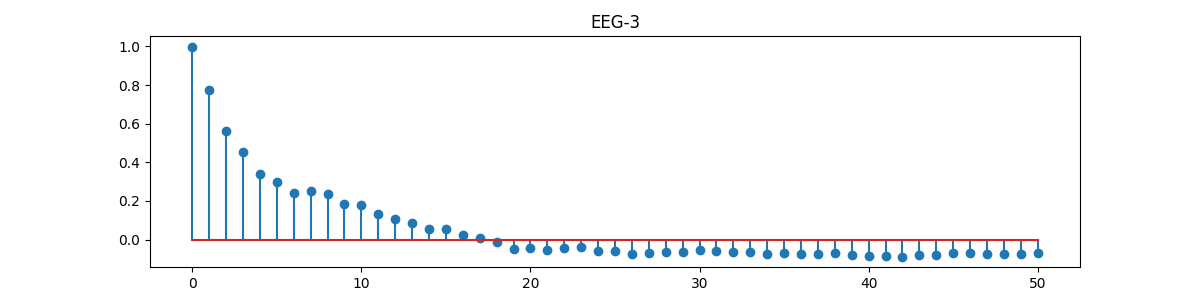

<IPython.core.display.Javascript object>


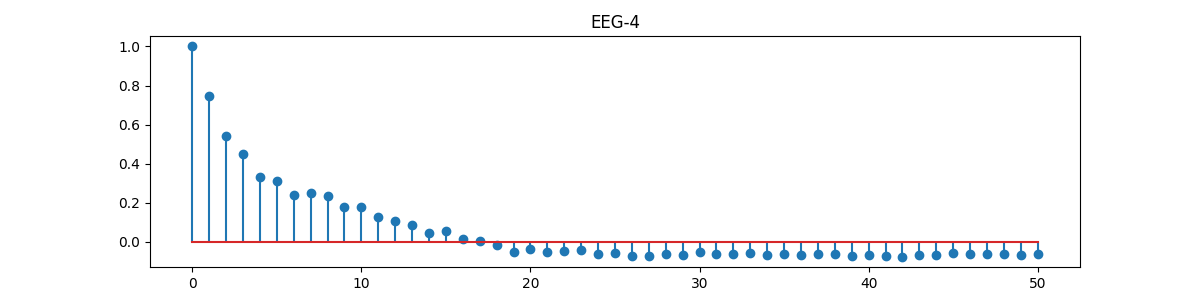

<IPython.core.display.Javascript object>


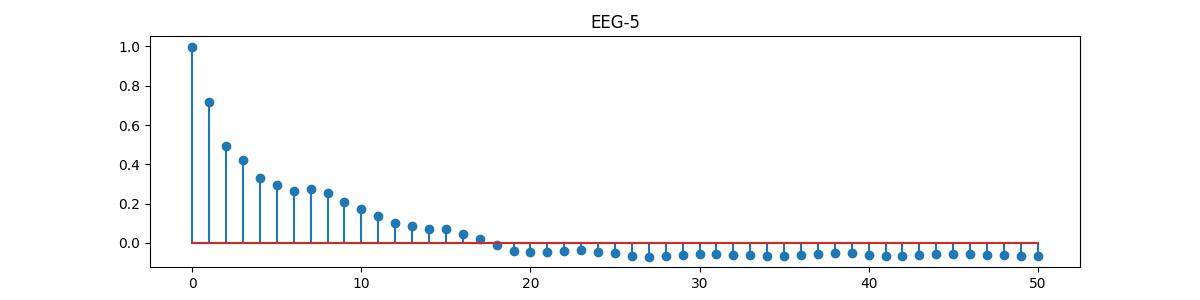

<IPython.core.display.Javascript object>


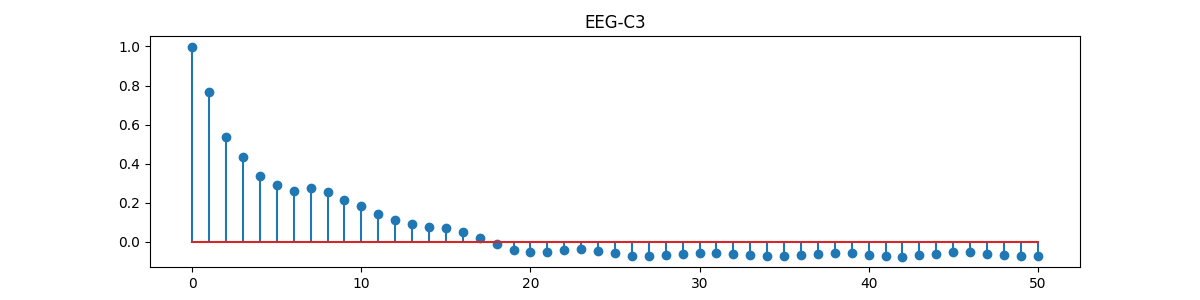

<IPython.core.display.Javascript object>


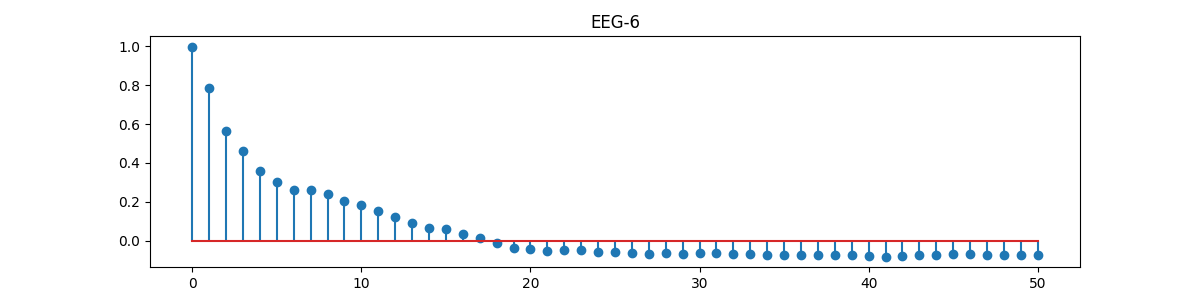

<IPython.core.display.Javascript object>


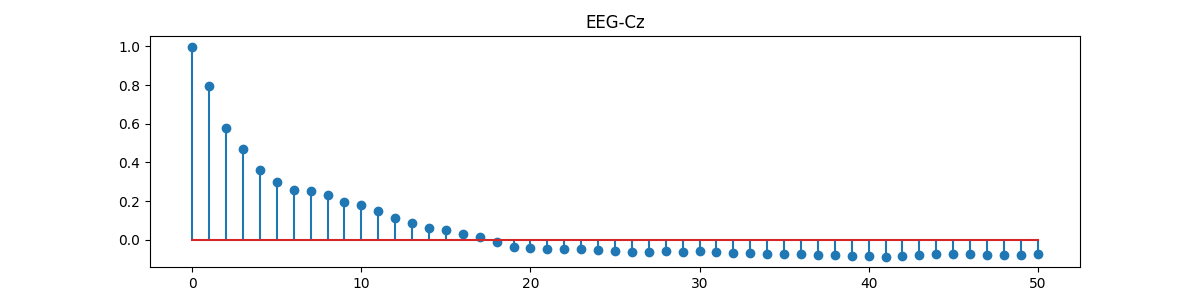

<IPython.core.display.Javascript object>


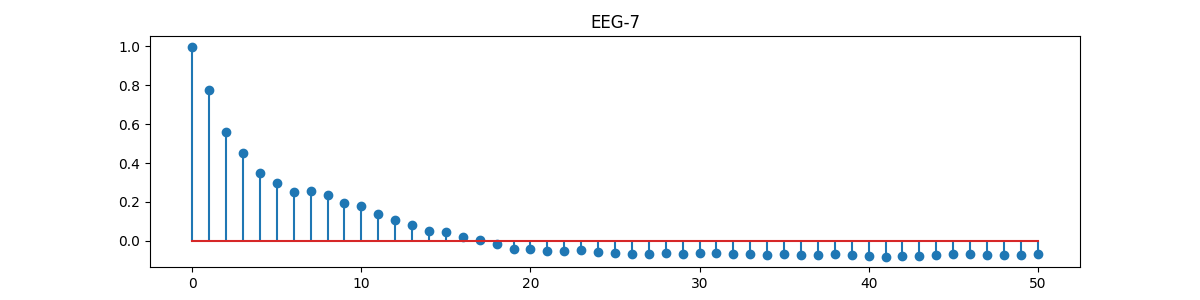

<IPython.core.display.Javascript object>


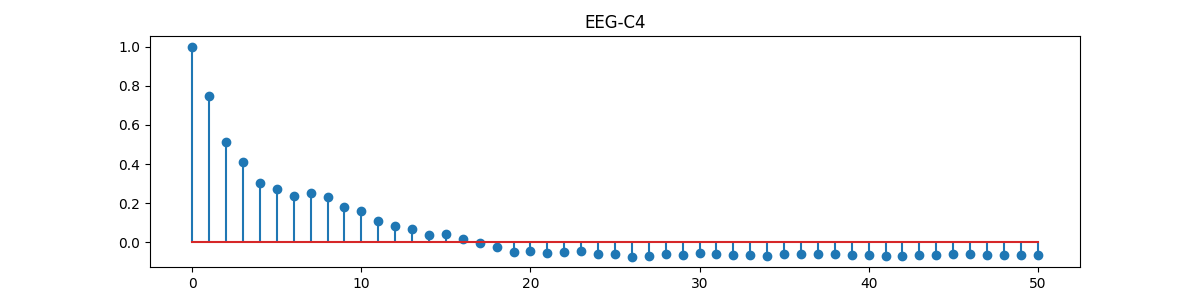

<IPython.core.display.Javascript object>


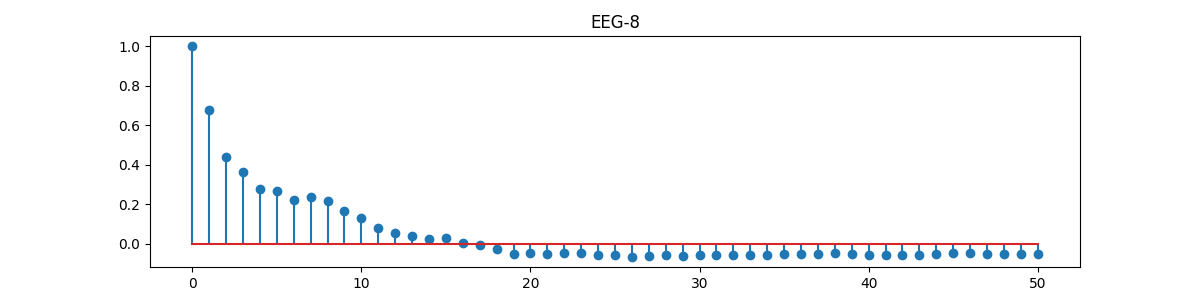

<IPython.core.display.Javascript object>


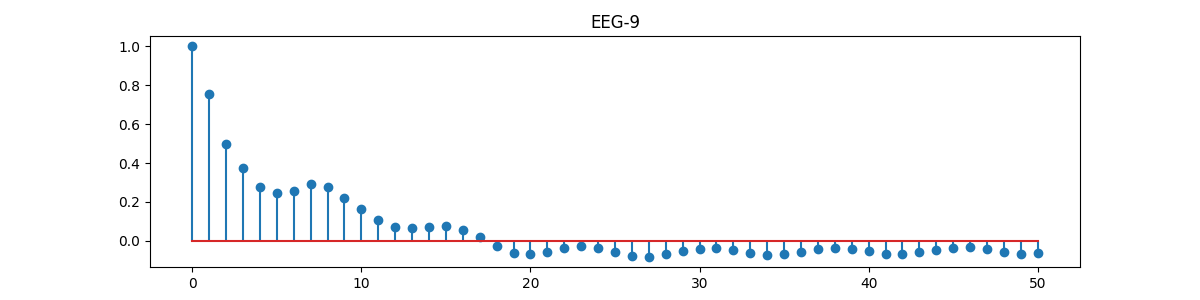

<IPython.core.display.Javascript object>


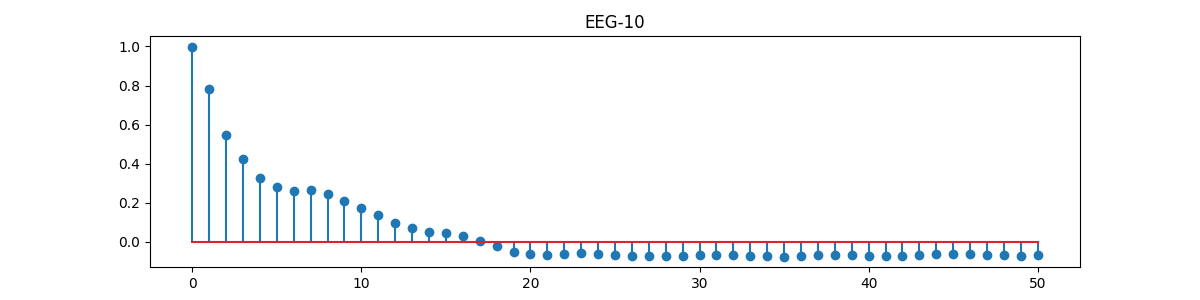

<IPython.core.display.Javascript object>


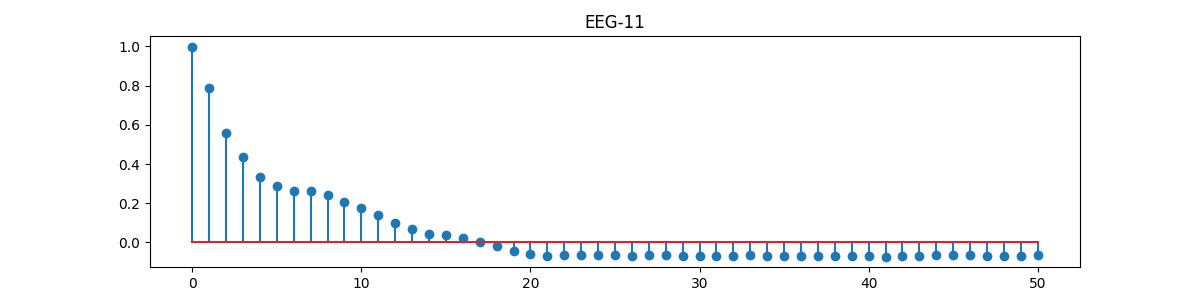

<IPython.core.display.Javascript object>


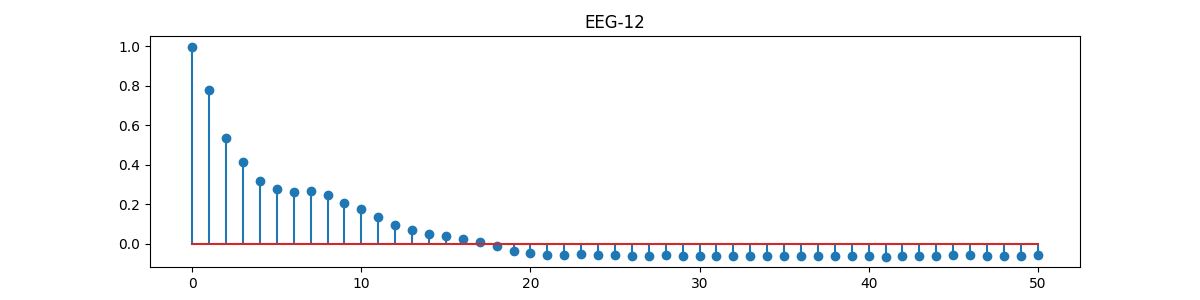

<IPython.core.display.Javascript object>


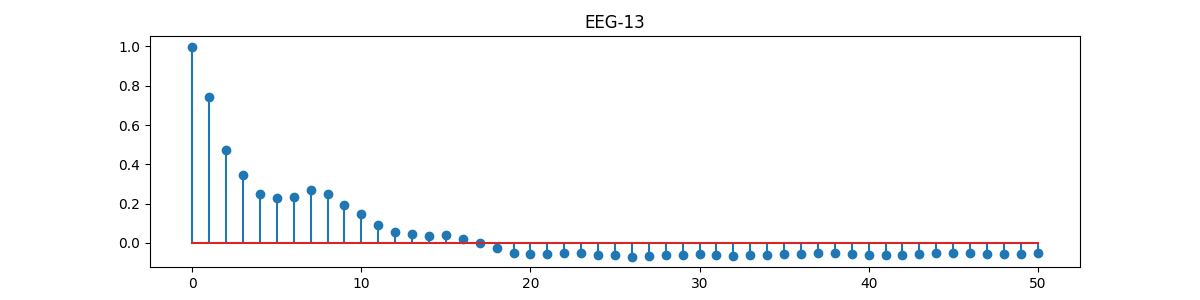

<IPython.core.display.Javascript object>


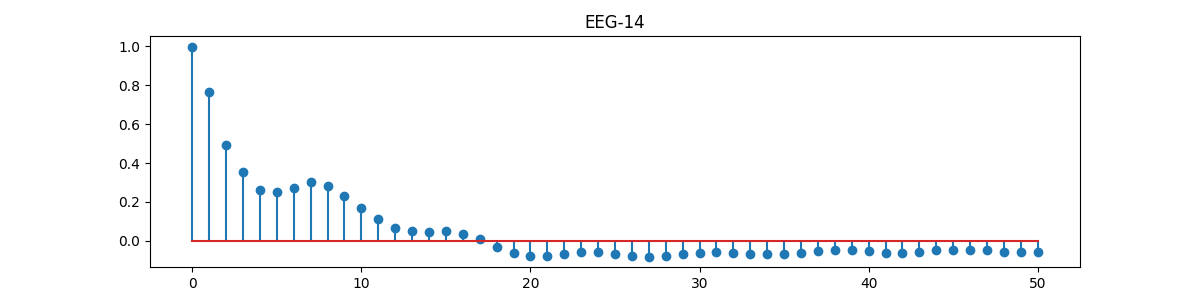

<IPython.core.display.Javascript object>


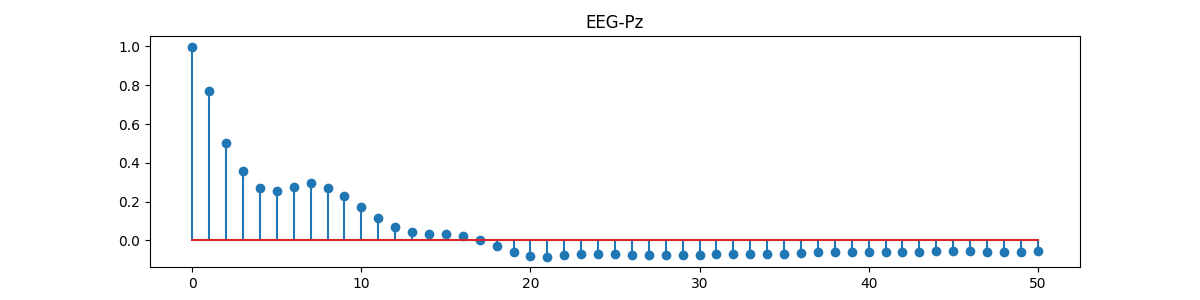

<IPython.core.display.Javascript object>


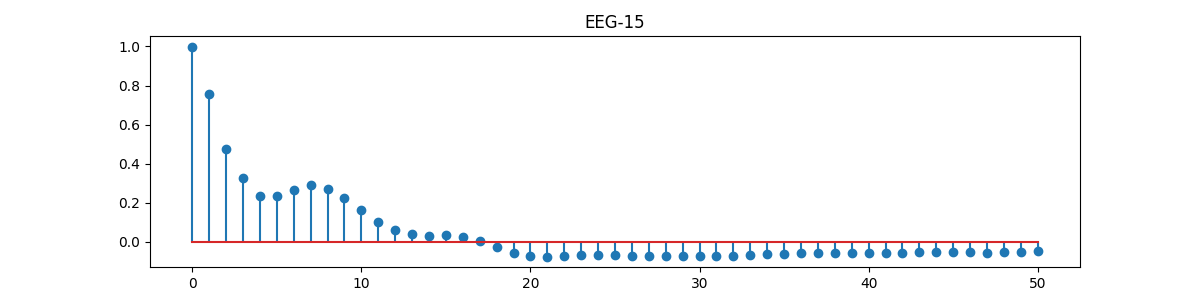

<IPython.core.display.Javascript object>


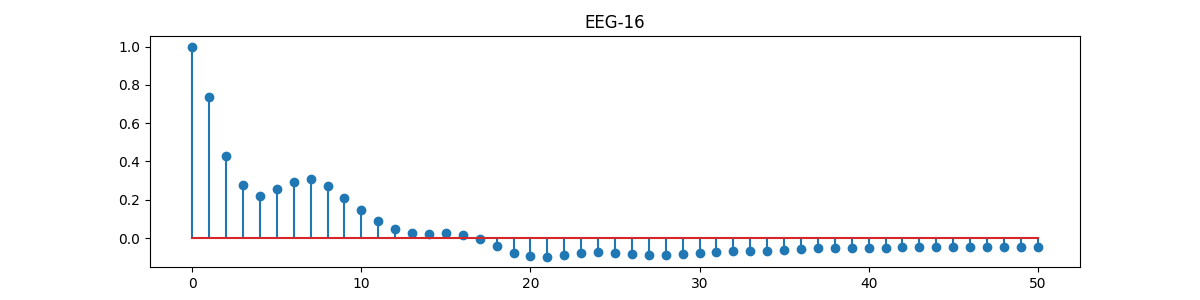

In [89]:
from scipy.stats import shapiro
channels = e.copy().load_data().filter(l_freq=None, h_freq=40).resample(90.)
data = channels.get_data()
for i in range(len(channels.ch_names)):
    x = data[:, i, :]
#     print(shapiro())
    plt.figure(figsize=(12, 3))
    plt.stem(multi_trial_acf(x, nlags=50))
    plt.title(channels.ch_names[i])
    plt.show()
    


<IPython.core.display.Javascript object>


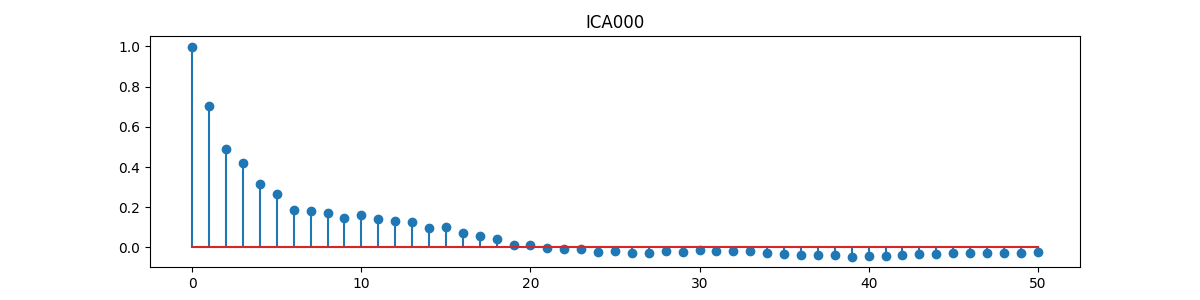

<IPython.core.display.Javascript object>


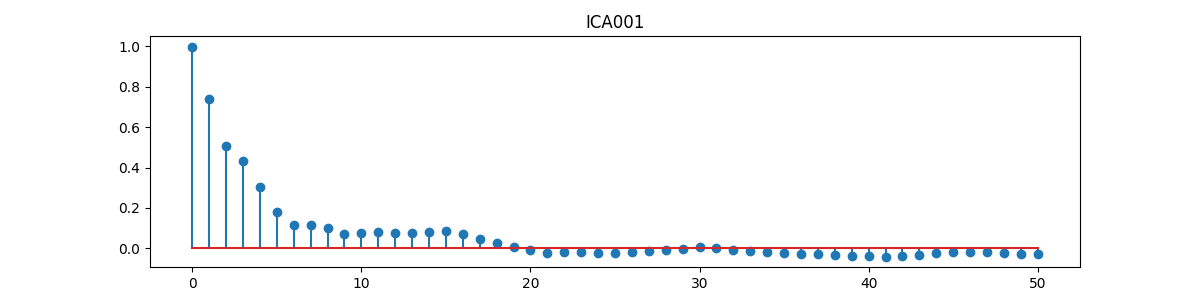

<IPython.core.display.Javascript object>


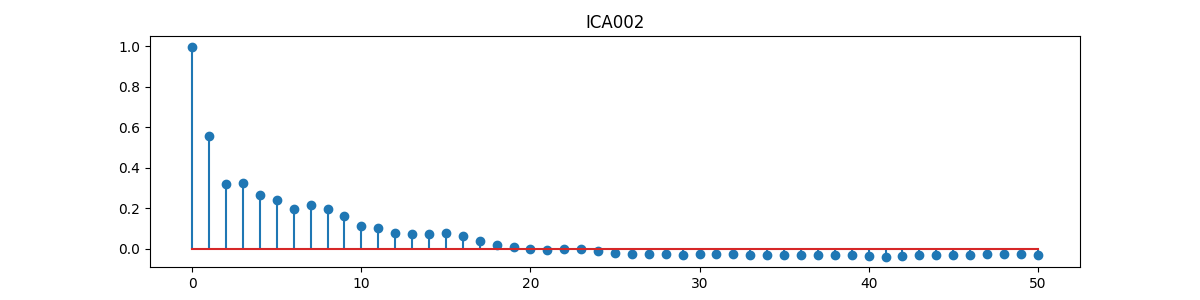

<IPython.core.display.Javascript object>


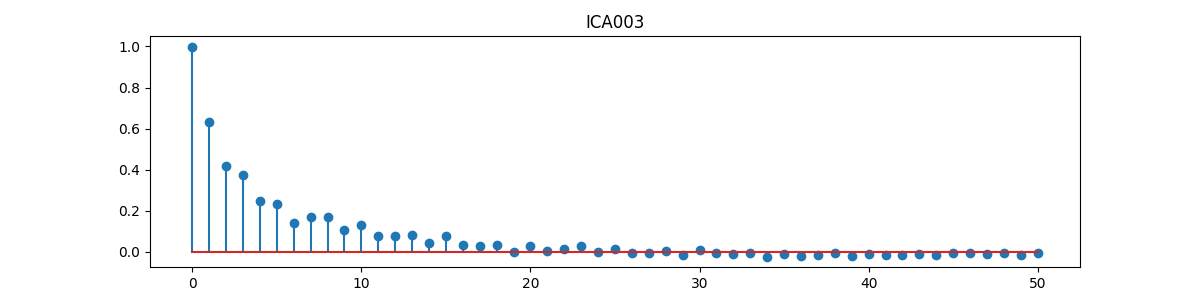

<IPython.core.display.Javascript object>


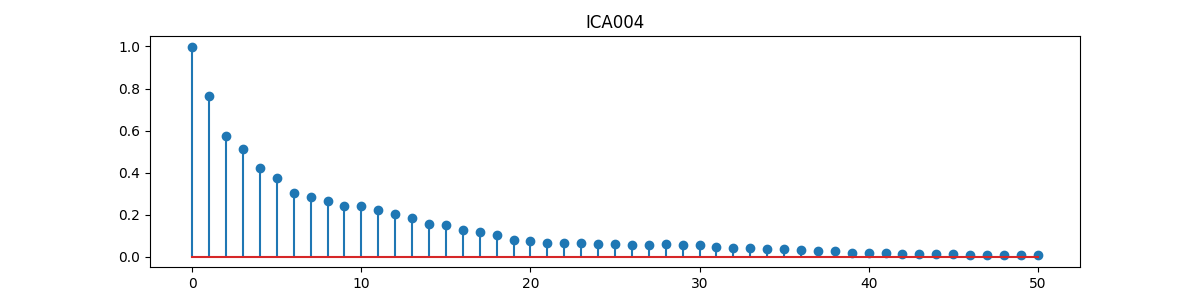

<IPython.core.display.Javascript object>


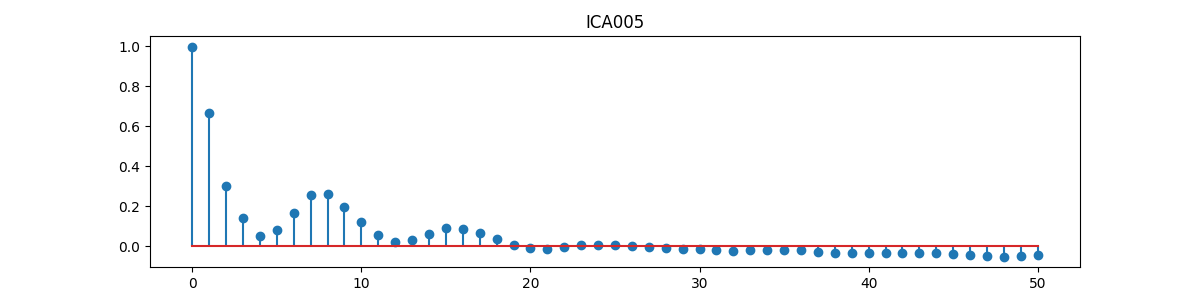

<IPython.core.display.Javascript object>


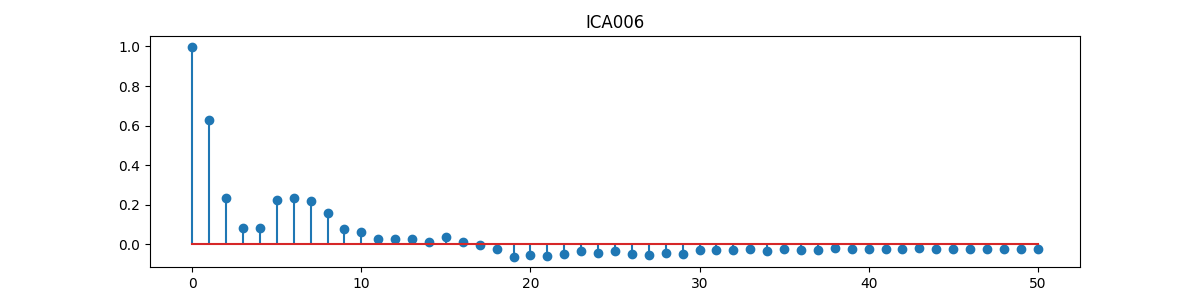

<IPython.core.display.Javascript object>


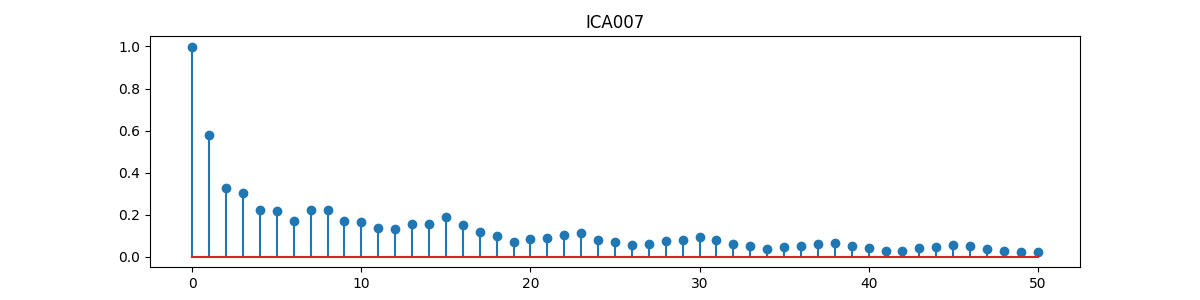

<IPython.core.display.Javascript object>


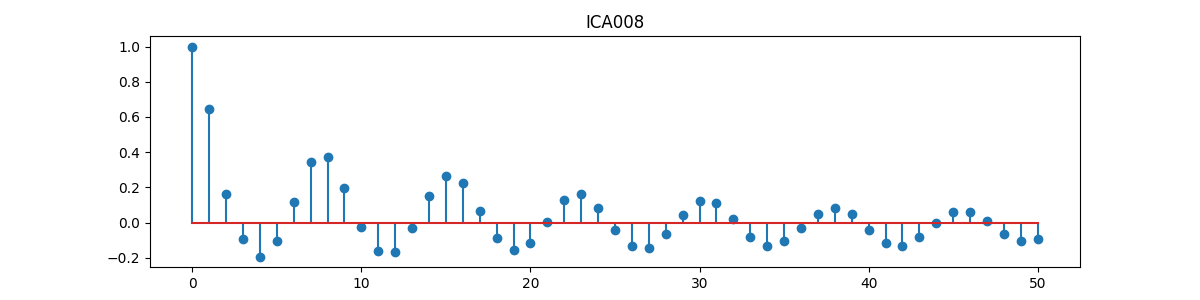

<IPython.core.display.Javascript object>


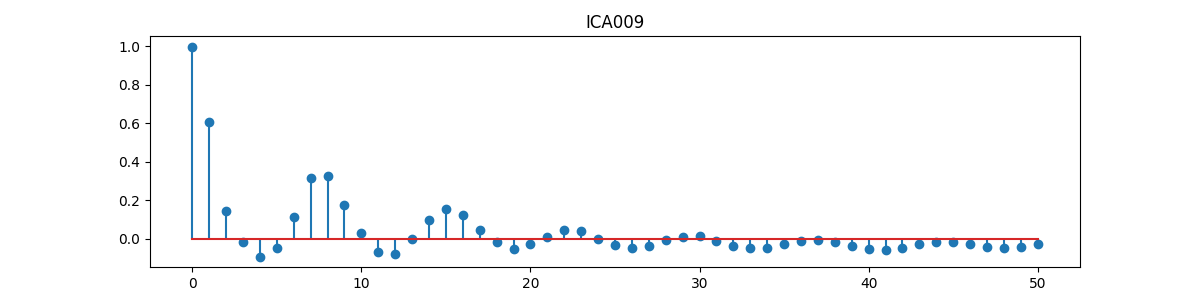

<IPython.core.display.Javascript object>


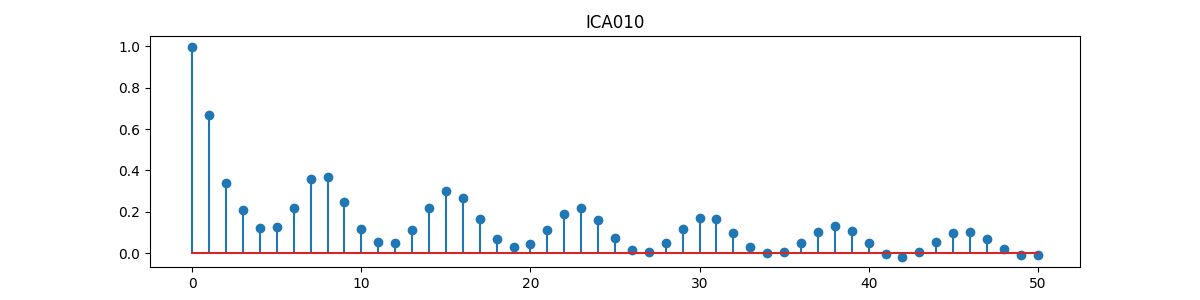

<IPython.core.display.Javascript object>


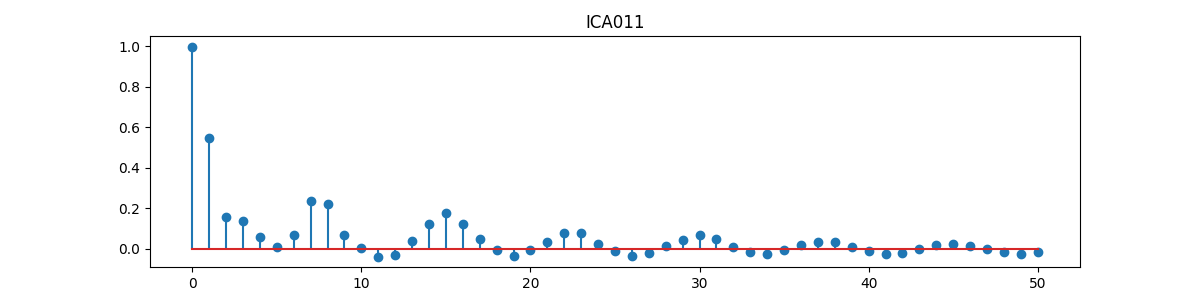

<IPython.core.display.Javascript object>


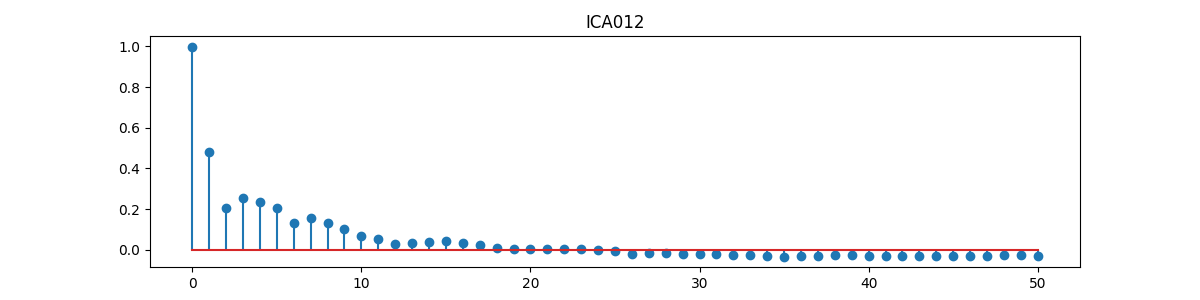

<IPython.core.display.Javascript object>


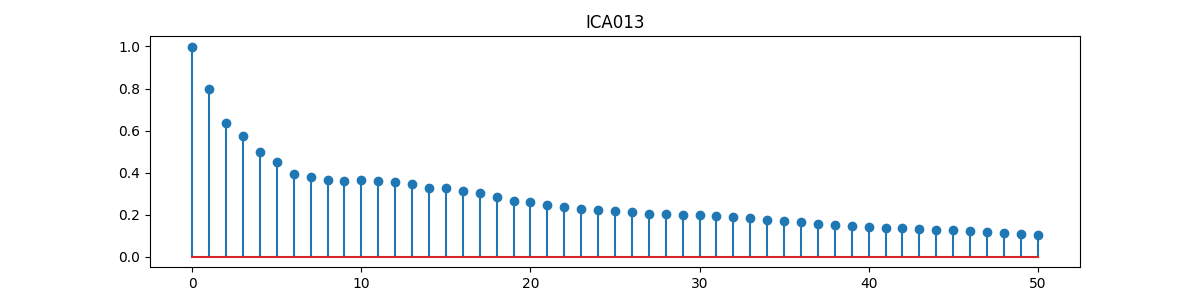

<IPython.core.display.Javascript object>


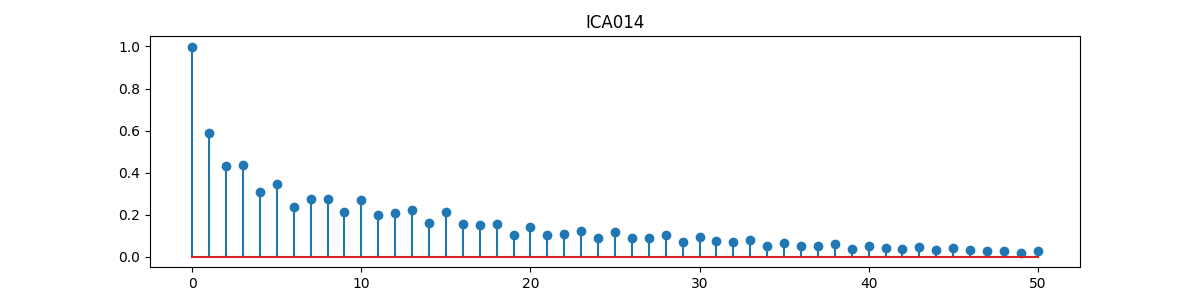

<IPython.core.display.Javascript object>


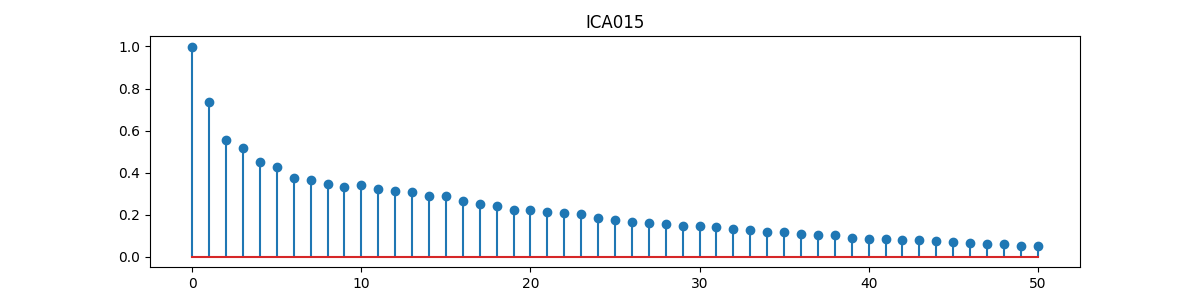

<IPython.core.display.Javascript object>


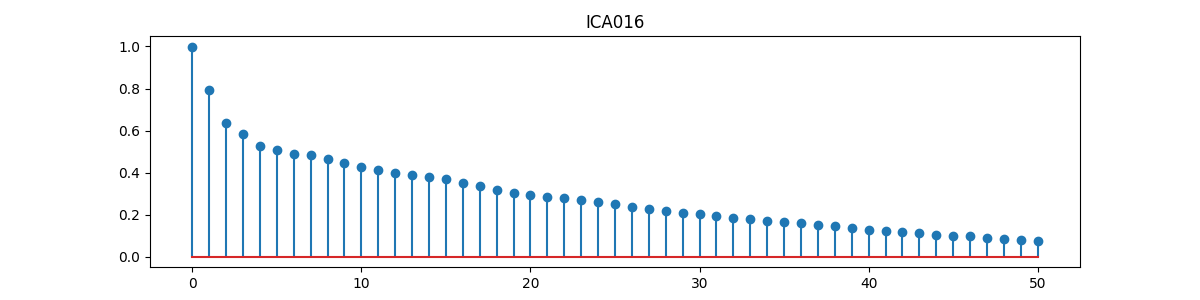

<IPython.core.display.Javascript object>


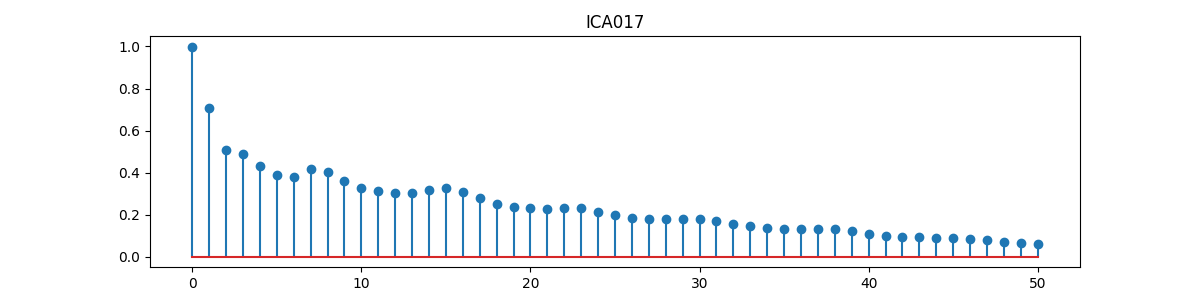

<IPython.core.display.Javascript object>


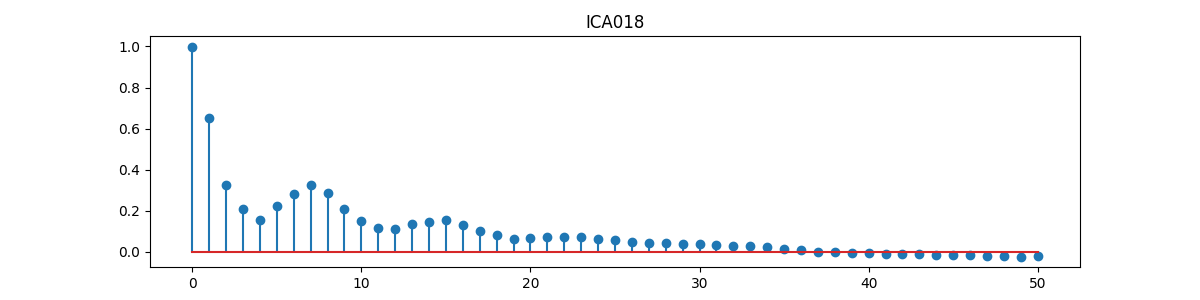

<IPython.core.display.Javascript object>


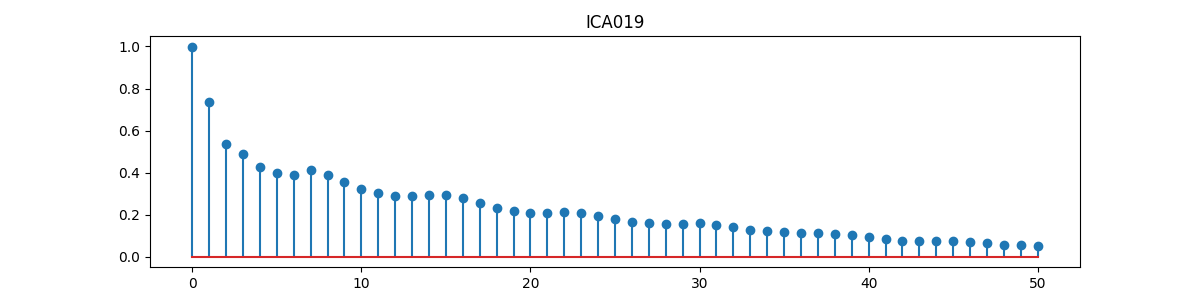

<IPython.core.display.Javascript object>


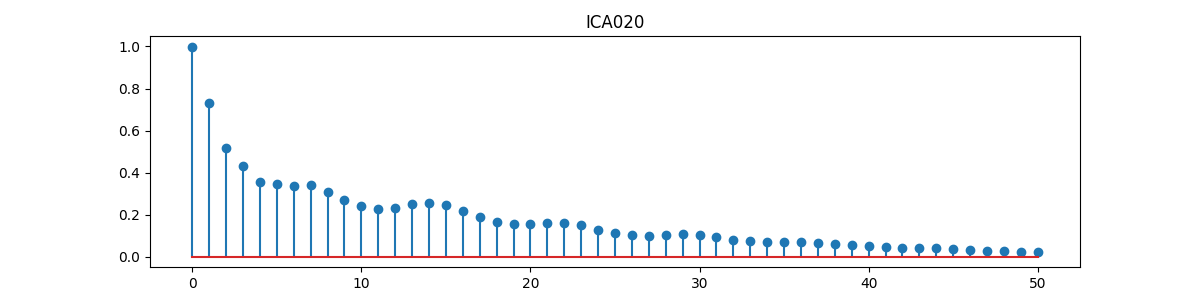

<IPython.core.display.Javascript object>


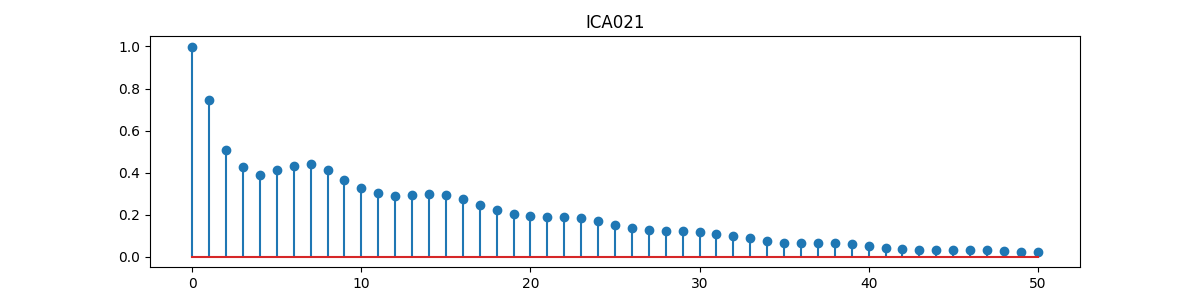

In [87]:
from scipy.stats import shapiro
sources = ICA.get_sources(e.copy()).load_data().filter(l_freq=None, h_freq=40).resample(90.)
data = sources.get_data()
for i in range(len(sources.ch_names)):
    x = data[:, i, :]
#     print(shapiro())
    plt.figure(figsize=(12, 3))
    plt.stem(multi_trial_acf(x, nlags=50))
    plt.title(sources.ch_names[i])
    plt.show()
    


<IPython.core.display.Javascript object>


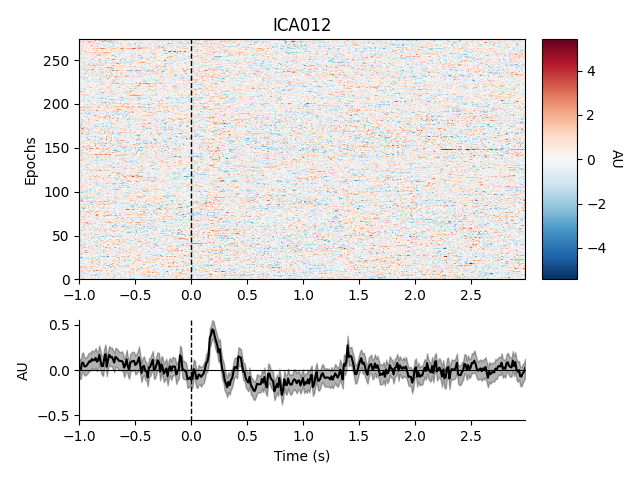

[<Figure size 640x480 with 3 Axes>]

In [135]:
mne.viz.plot_epochs_image(sources, picks="ICA012")

<IPython.core.display.Javascript object>


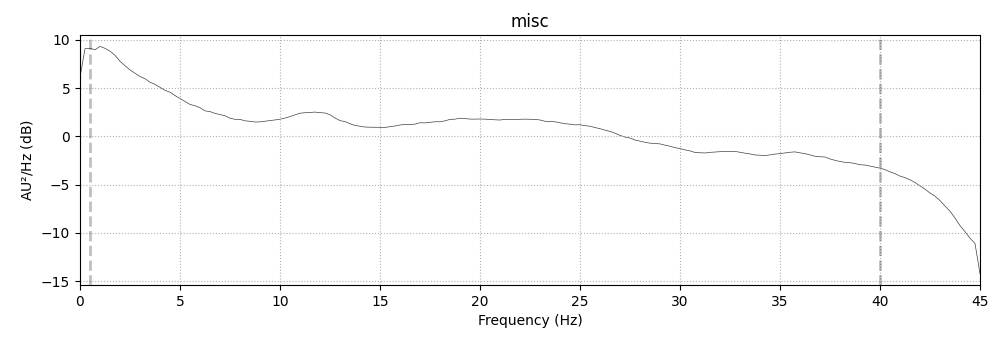

In [133]:
mne.viz.plot_epochs_psd(sources, picks="ICA012");